In [146]:
import pandas as pd

In [147]:
# read raw data from csv

res = pd.read_csv("food_data.csv")

In [148]:
res


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


In [149]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

1. Rename columns

In [150]:
res.rename(columns={'rate':'rating','approx_cost(for two people)':'approx_cost','listed_in(type)':'type'}, inplace=True)

In [151]:
res.head(3)

,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet


2. Handling null values

In [152]:
res.isna().sum()

address            17
name               16
online_order       19
book_table         58
rating           7838
votes              78
phone            1296
location          126
rest_type         338
dish_liked      28225
cuisines          203
approx_cost       521
type             4610
dtype: int64

In [153]:
res.dropna(subset=['name', 'address'], inplace=True)
res['online_order'] = res['online_order'].fillna('NA')
res['book_table'] = res['book_table'].fillna('NA')
res['rating'] = res['rating'].fillna(0)
res['votes'] = res['votes'].fillna(0)
res['phone'] = res['phone'].fillna('NA')
res['location'] = res['location'].fillna('NA')
res['rest_type'] = res['rest_type'].fillna('NA')
res['dish_liked'] = res['dish_liked'].fillna('NA')
res['cuisines'] = res['cuisines'].fillna('NA')
res['approx_cost'] = res['approx_cost'].fillna(0)
res['type'] = res['type'].fillna('NA')


In [154]:
res.isna().sum()

address         0
name            0
online_order    0
book_table      0
rating          0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
approx_cost     0
type            0
dtype: int64

3. Remove duplicates

In [155]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56235 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       56235 non-null  object
 1   name          56235 non-null  object
 2   online_order  56235 non-null  object
 3   book_table    56235 non-null  object
 4   rating        56235 non-null  object
 5   votes         56235 non-null  object
 6   phone         56235 non-null  object
 7   location      56235 non-null  object
 8   rest_type     56235 non-null  object
 9   dish_liked    56235 non-null  object
 10  cuisines      56235 non-null  object
 11  approx_cost   56235 non-null  object
 12  type          56235 non-null  object
dtypes: object(13)
memory usage: 6.0+ MB


In [156]:
res.drop_duplicates(inplace=True)

In [157]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40547 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       40547 non-null  object
 1   name          40547 non-null  object
 2   online_order  40547 non-null  object
 3   book_table    40547 non-null  object
 4   rating        40547 non-null  object
 5   votes         40547 non-null  object
 6   phone         40547 non-null  object
 7   location      40547 non-null  object
 8   rest_type     40547 non-null  object
 9   dish_liked    40547 non-null  object
 10  cuisines      40547 non-null  object
 11  approx_cost   40547 non-null  object
 12  type          40547 non-null  object
dtypes: object(13)
memory usage: 4.3+ MB


In [158]:
# Example of one restaurant has many duplicated data
res[res.address=='942, 21st Main Road, 2nd Stage, Banashankari, Bangalore']

,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
472,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Delivery
579,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\r\r\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Dine-out
3596,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,804,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Paneer Lajawab, Masala Pa...","North Indian, Mughlai, Chinese",800,Dine-out
20696,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
21780,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Delivery
22724,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1 /5,783,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Dine-out


In [159]:
res.drop_duplicates(subset=['address'], inplace=True)

In [160]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13397 entries, 0 to 56236
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       13397 non-null  object
 1   name          13397 non-null  object
 2   online_order  13397 non-null  object
 3   book_table    13397 non-null  object
 4   rating        13397 non-null  object
 5   votes         13397 non-null  object
 6   phone         13397 non-null  object
 7   location      13397 non-null  object
 8   rest_type     13397 non-null  object
 9   dish_liked    13397 non-null  object
 10  cuisines      13397 non-null  object
 11  approx_cost   13397 non-null  object
 12  type          13397 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


4. Text cleaning

In [161]:
# Remove unrelated text
res = res[res['address'].str.contains('rated', case=False)==False]
res = res[res['name'].str.contains('rated', case=False)==False]
res = res[res['online_order'].str.contains('rated', case=False)==False]
res = res[res['book_table'].str.contains('rated', case=False)==False]
res = res[res['rating'].str.contains('rated', case=False)==False]
res = res[res['votes'].str.contains('rated', case=False)==False]
res = res[res['phone'].str.contains('rated', case=False)==False]
res = res[res['location'].str.contains('rated', case=False)==False]
res = res[res['rest_type'].str.contains('rated', case=False)==False]
res = res[res['dish_liked'].str.contains('rated', case=False)==False]
res = res[res['cuisines'].str.contains('rated', case=False)==False]
res = res[res['approx_cost'].str.contains('rated', case=False)==False]
res = res[res['type'].str.contains('rated', case=False)==False]


In [162]:
res.shape

(9306, 13)

In [163]:
res.to_csv('food_data_v1.csv')

In [164]:
# Clean online_order and book_table
valid_values = ['Yes', 'No']
res=res.drop(res[~(res['online_order'].isin(valid_values))].index.tolist())
res=res.drop(res[~(res['book_table'].isin(valid_values))].index.tolist())

In [165]:
res.shape

(9304, 13)

In [166]:
res.to_csv('food_data_v2.csv')

In [167]:
# Clean rating
res = res[~res['rating'].str.contains('[a-z]')]
res['rating'] = res['rating'].replace(['-', 'NEW'], '0')
res['rating'] = res['rating'].str.replace('/5', '') 

def convert_type(x):
    if x=='0':
        return 0
    else:
        return x

res['rating'] = res['rating'].apply(convert_type)


In [168]:
# Clean approx_cost
res['approx_cost'] = res['approx_cost'].str.replace(',', '')

In [169]:
res['rating'] = res['rating'].astype(float)
res['votes'] = res['votes'].astype(int)
res['approx_cost'] = res['approx_cost'].astype(int)

In [170]:
res['approx_cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1400, 1350, 1700, 2200,
       2000, 1800, 1900,  180,  330, 2100, 3000, 2800, 2500, 3400,   50,
         40, 1250, 2400, 1450,   70,  560, 3500,  240,  360, 1050, 2300,
       4100,  120, 2600, 1650, 2700])

In [171]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304 entries, 0 to 56201
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       9304 non-null   object 
 1   name          9304 non-null   object 
 2   online_order  9304 non-null   object 
 3   book_table    9304 non-null   object 
 4   rating        9304 non-null   float64
 5   votes         9304 non-null   int32  
 6   phone         9304 non-null   object 
 7   location      9304 non-null   object 
 8   rest_type     9304 non-null   object 
 9   dish_liked    9304 non-null   object 
 10  cuisines      9304 non-null   object 
 11  approx_cost   9304 non-null   int32  
 12  type          9304 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 944.9+ KB


In [172]:
# Remove unknown characters
res['name'] = res['name'].str.replace('[^ -~]+', '', regex=True)
res['address'] = res['address'].str.replace('[^ -~]+', '', regex=True)

In [173]:
res['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...',
       'Nawabs Empire', 'SeeYa Restaurant'], dtype=object)

In [174]:
res.to_csv('food_data_v3.csv')

In [175]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304 entries, 0 to 56201
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       9304 non-null   object 
 1   name          9304 non-null   object 
 2   online_order  9304 non-null   object 
 3   book_table    9304 non-null   object 
 4   rating        9304 non-null   float64
 5   votes         9304 non-null   int32  
 6   phone         9304 non-null   object 
 7   location      9304 non-null   object 
 8   rest_type     9304 non-null   object 
 9   dish_liked    9304 non-null   object 
 10  cuisines      9304 non-null   object 
 11  approx_cost   9304 non-null   int32  
 12  type          9304 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 944.9+ KB


In [176]:
res.to_csv('food_data_cleaned.csv', index=False)

Visualization

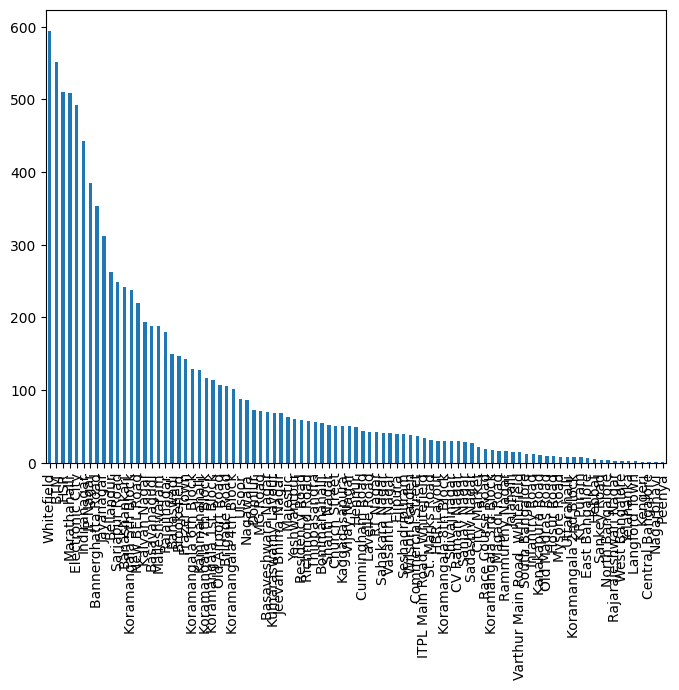

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=100)

res['location'].value_counts().plot(kind='bar')
plt.show()

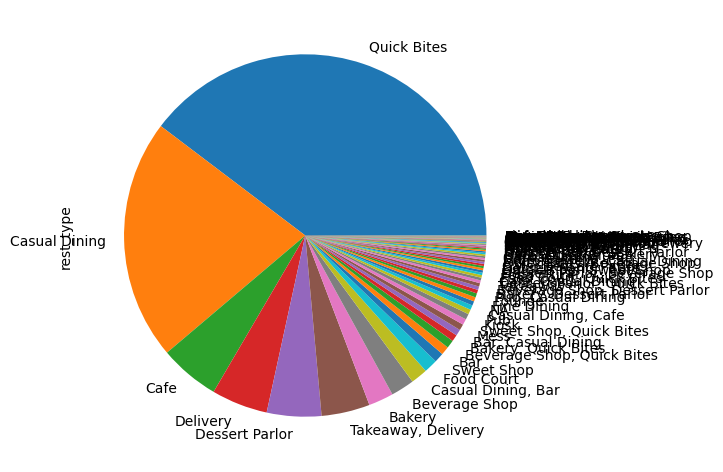

In [178]:
plt.figure(figsize=(8,6), dpi=100, facecolor='white')
res['rest_type'].value_counts().plot(kind='pie')

plt.show()

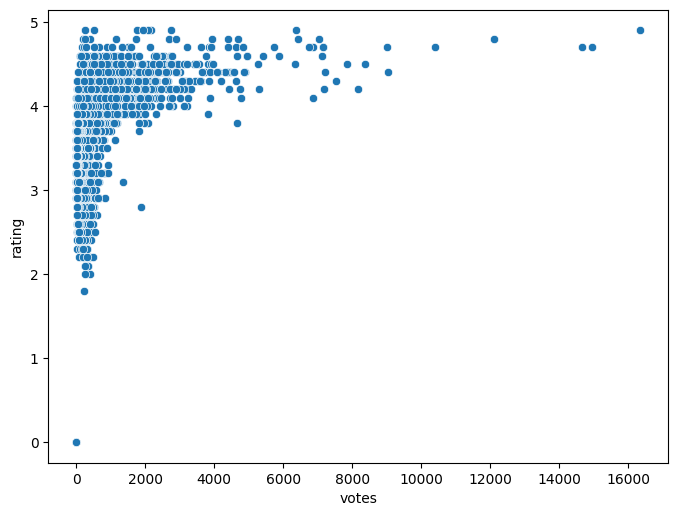

In [179]:
import seaborn as sns
data = res[['rating', 'votes']]
data = data.dropna()

X = data['votes'].values.reshape(-1, 1)
y = data['rating'].values.reshape(-1, 1)

plt.figure(figsize=(8,6), dpi=100, facecolor='white')
sns.scatterplot(x='votes', y='rating', data=res)
plt.show()

Process

In [180]:
import numpy as np
data = pd.read_csv('food_data_cleaned.csv')
data['score'] = 0.0

data['dish_liked'] = data['dish_liked'].astype(str)
data['cuisines'] = data['cuisines'].astype(str)


In [181]:
# features = ['online_order', 'book_table', 'location', 'dish_liked', 'cuisines', 'type']
input = {'online_order':'Yes', 'book_table':'Yes', 'location':'Banashankari', 'dish_liked':'Noodle', 
         'cuisines':'Indian', 'type':'Delivery'}


data['score'] += data['online_order'].apply(lambda x: 1 if x==input['online_order'] else 0)
data['score'] += data['book_table'].apply(lambda x: 1 if x==input['book_table'] else 0)
data['score'] += data['location'].apply(lambda x: 15 if x==input['location'] else 0)
data['score'] += 10*data['rating']
data['score'] += 4*np.log10(1+data['votes'])
data['score'] += data['dish_liked'].apply(lambda x: 3 if input['dish_liked'] in x else 0)
data['score'] += data['cuisines'].apply(lambda x: 5 if input['cuisines'] in x else 0)
data['score'] += data['type'].apply(lambda x: 3 if x==input['type'] else 0)
    

In [182]:
data.nlargest(20, columns='score')

,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,type,score
403,"199/1, Ajanaya Bhavana, 100 Feet Ring Road, Ka...",Ayodhya Upachar,Yes,No,4.3,734,080 26694999\r\n00 09901269901,Banashankari,Quick Bites,"Panneer Butter Masala, Vada, Curd Rice, Idli, ...","South Indian, North Indian, Chinese, Street Food",200,Delivery,78.465149
446,"115, 100 Feet Ring Road, Kathriguppe, Banashan...",Taaza Thindi,No,No,4.7,651,080 49510845,Banashankari,Quick Bites,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",South Indian,100,Dine-out,78.256990
52,"10, Stavyah Arcade, 3rd Floor 9th Main, Yarab ...",FreshMenu,Yes,No,3.9,627,080 40424242,Banashankari,Delivery,"Salads, Sandwiches, Salad, Thai Rice, Pasta, N...","Healthy Food, Chinese, Biryani, North Indian, ...",450,Delivery,77.191839
35,"8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...",Szechuan Dragon,Yes,No,4.2,1647,00 919663567711\r\n+91 9916326323,Banashankari,Casual Dining,"Noodles, Momos, Veg Manchow Soup, Kung Pao Chi...","Chinese, Thai, Momos",600,Delivery,76.867829
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Cafes,76.630923
260,"2465, 2nd Floor, Opposite BDA Complex, 24th Cr...",Hara Fine Dine,Yes,Yes,4.0,633,080 42112211\r\n+91 9880412211,Banashankari,Casual Dining,"Hara Bhara Kabab, Crispy Corn, Patiala Paneer,...","North Indian, Chinese",800,Delivery,76.208357
159,"7/1, Behind BMS College Hostel, Hanumantha Nag...",Mini Punjabi Dhaba,Yes,No,4.2,287,+91 9845044074\r\n+91 7406012344,Banashankari,Quick Bites,"Panneer Butter Masala, Lassi, Paratha, Jeera R...",North Indian,350,Delivery,75.837570
63,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...",1200,Delivery,75.756079
59,"296, Ram Towers, 100 Feet Ring Road, Banashank...",1947,No,Yes,4.0,808,080 26791213\r\n+91 9739989446,Banashankari,Casual Dining,"Salads, Panneer Butter Masala, Rabri, Gajar Ka...","North Indian, Chinese",850,Delivery,75.631794
114,"21, 80 Feet Road, 3rd Phase, 4th Block, 3rd St...",Anna Kuteera,Yes,No,4.0,771,+91 9620009302,Banashankari,Casual Dining,"Panner Tikka, Kulfi, Coffee, Pav Bhaji, Carrot...","South Indian, North Indian, Chinese",450,Delivery,75.550469
